In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [123]:
data = pd.read_csv("dataset/car details.csv")
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [124]:
data.shape

(2059, 20)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [126]:
for i in data.columns:
    a = i.split(' ')
    b = '_'.join(a)
    data.rename(columns={i:b.lower()}, inplace=True)

In [127]:
data.isna().sum()


make                    0
model                   0
price                   0
year                    0
kilometer               0
fuel_type               0
transmission            0
location                0
color                   0
owner                   0
seller_type             0
engine                 80
max_power              80
max_torque             80
drivetrain            136
length                 64
width                  64
height                 64
seating_capacity       64
fuel_tank_capacity    113
dtype: int64

In [128]:
data['engine'] = data['engine'].str.extract(r'(\d+)').astype(float)



In [129]:
data['engine'] = data['engine'].fillna(data['engine'].median())

In [130]:
data['max_power_bhp'] = data['max_power'].str.extract(r'(\d+)').astype(float)
data['max_power_rpm'] = data['max_power'].str.extract(r'@ *(\d+)').astype(float)

data['max_power_bhp'] = data['max_power_bhp'].fillna(data['max_power_bhp'].median())
data['max_power_rpm'] = data['max_power_rpm'].fillna(data['max_power_rpm'].median())

In [131]:
data['max_torque_np'] = data['max_torque'].str.extract(r'(\d+)').astype(float)
data['max_torque_rpm'] = data['max_torque'].str.extract(r'@ *(\d+)').astype(float)

data['max_torque_np'] = data['max_torque_np'].fillna(data['max_torque_np'].median())
data['max_torque_rpm'] = data['max_torque_rpm'].fillna(data['max_torque_rpm'].median())

In [132]:
data.drop(columns=['make','color','location', 'max_power','max_torque'], inplace=True)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               2059 non-null   object 
 1   price               2059 non-null   int64  
 2   year                2059 non-null   int64  
 3   kilometer           2059 non-null   int64  
 4   fuel_type           2059 non-null   object 
 5   transmission        2059 non-null   object 
 6   owner               2059 non-null   object 
 7   seller_type         2059 non-null   object 
 8   engine              2059 non-null   float64
 9   drivetrain          1923 non-null   object 
 10  length              1995 non-null   float64
 11  width               1995 non-null   float64
 12  height              1995 non-null   float64
 13  seating_capacity    1995 non-null   float64
 14  fuel_tank_capacity  1946 non-null   float64
 15  max_power_bhp       2059 non-null   float64
 16  max_po

In [134]:
data.isna().sum()


model                   0
price                   0
year                    0
kilometer               0
fuel_type               0
transmission            0
owner                   0
seller_type             0
engine                  0
drivetrain            136
length                 64
width                  64
height                 64
seating_capacity       64
fuel_tank_capacity    113
max_power_bhp           0
max_power_rpm           0
max_torque_np           0
max_torque_rpm          0
dtype: int64

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               2059 non-null   object 
 1   price               2059 non-null   int64  
 2   year                2059 non-null   int64  
 3   kilometer           2059 non-null   int64  
 4   fuel_type           2059 non-null   object 
 5   transmission        2059 non-null   object 
 6   owner               2059 non-null   object 
 7   seller_type         2059 non-null   object 
 8   engine              2059 non-null   float64
 9   drivetrain          1923 non-null   object 
 10  length              1995 non-null   float64
 11  width               1995 non-null   float64
 12  height              1995 non-null   float64
 13  seating_capacity    1995 non-null   float64
 14  fuel_tank_capacity  1946 non-null   float64
 15  max_power_bhp       2059 non-null   float64
 16  max_po

In [136]:
data['drivetrain'] = data['drivetrain'].fillna(data['drivetrain'].mode()[0])

In [137]:
for col in data.select_dtypes(include=['float64']).columns:
    data[col] = data[col].fillna(data[col].median())


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               2059 non-null   object 
 1   price               2059 non-null   int64  
 2   year                2059 non-null   int64  
 3   kilometer           2059 non-null   int64  
 4   fuel_type           2059 non-null   object 
 5   transmission        2059 non-null   object 
 6   owner               2059 non-null   object 
 7   seller_type         2059 non-null   object 
 8   engine              2059 non-null   float64
 9   drivetrain          2059 non-null   object 
 10  length              2059 non-null   float64
 11  width               2059 non-null   float64
 12  height              2059 non-null   float64
 13  seating_capacity    2059 non-null   float64
 14  fuel_tank_capacity  2059 non-null   float64
 15  max_power_bhp       2059 non-null   float64
 16  max_po

In [139]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.0,825000.0,1925000.0,35000000.0
year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.0,2017.0,2019.0,2022.0
kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.0,50000.0,72000.0,2000000.0
engine,2059.0,1.685016e+03,6.322201e+02,624.0,1198.0,1498.0,1995.0,6592.0
length,2059.0,4.283631e+03,4.357991e+02,3099.0,3986.0,4370.0,4620.0,5569.0
width,2059.0,1.768054e+03,1.331464e+02,1475.0,1695.0,1770.0,1831.0,2220.0
height,2059.0,1.590283e+03,1.341869e+02,1165.0,1485.0,1545.0,1672.0,1995.0
seating_capacity,2059.0,5.296746e+00,8.110295e-01,2.0,5.0,5.0,5.0,8.0
fuel_tank_capacity,2059.0,5.189233e+01,1.469659e+01,15.0,42.0,50.0,60.0,105.0
max_power_bhp,2059.0,1.290826e+02,6.385102e+01,35.0,83.0,116.0,169.0,660.0


In [140]:
label_encoder = LabelEncoder()

for obj in data.select_dtypes(include=['object']).columns:
    data[obj] = label_encoder.fit_transform(data[obj])

In [141]:
data.head()

,model,price,year,kilometer,fuel_type,transmission,owner,seller_type,engine,drivetrain,length,width,height,seating_capacity,fuel_tank_capacity,max_power_bhp,max_power_rpm,max_torque_np,max_torque_rpm
0,106,505000,2017,87150,6,1,1,1,1198.0,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,802,450000,2014,75000,2,1,3,2,1248.0,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,1030,220000,2011,67000,6,1,1,2,1197.0,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.0,4000.0
3,492,799000,2019,37500,6,1,1,2,1197.0,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,548,1950000,2018,69000,2,1,1,2,2393.0,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               2059 non-null   int64  
 1   price               2059 non-null   int64  
 2   year                2059 non-null   int64  
 3   kilometer           2059 non-null   int64  
 4   fuel_type           2059 non-null   int64  
 5   transmission        2059 non-null   int64  
 6   owner               2059 non-null   int64  
 7   seller_type         2059 non-null   int64  
 8   engine              2059 non-null   float64
 9   drivetrain          2059 non-null   int64  
 10  length              2059 non-null   float64
 11  width               2059 non-null   float64
 12  height              2059 non-null   float64
 13  seating_capacity    2059 non-null   float64
 14  fuel_tank_capacity  2059 non-null   float64
 15  max_power_bhp       2059 non-null   float64
 16  max_po

In [143]:
data.corr(method='pearson')['price'].sort_values(ascending=False)


price                 1.000000
max_power_bhp         0.775918
max_torque_np         0.666653
engine                0.611275
fuel_tank_capacity    0.560842
width                 0.559786
length                0.551212
year                  0.311400
height                0.076279
owner                 0.029360
seating_capacity     -0.036116
seller_type          -0.070351
model                -0.078589
drivetrain           -0.089471
fuel_type            -0.128157
kilometer            -0.150825
max_power_rpm        -0.190992
max_torque_rpm       -0.305911
transmission         -0.476843
Name: price, dtype: float64

In [144]:
data.drop(columns=['owner','kilometer','max_power_rpm', 'max_torque_rpm','model','seller_type','seating_capacity','drivetrain'], inplace=True)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               2059 non-null   int64  
 1   year                2059 non-null   int64  
 2   fuel_type           2059 non-null   int64  
 3   transmission        2059 non-null   int64  
 4   engine              2059 non-null   float64
 5   length              2059 non-null   float64
 6   width               2059 non-null   float64
 7   height              2059 non-null   float64
 8   fuel_tank_capacity  2059 non-null   float64
 9   max_power_bhp       2059 non-null   float64
 10  max_torque_np       2059 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 177.1 KB


In [146]:
data.corr()['price'].sort_values(ascending=False)

price                 1.000000
max_power_bhp         0.775918
max_torque_np         0.666653
engine                0.611275
fuel_tank_capacity    0.560842
width                 0.559786
length                0.551212
year                  0.311400
height                0.076279
fuel_type            -0.128157
transmission         -0.476843
Name: price, dtype: float64

In [147]:
data['car_age'] = 2025 - data['year']

In [148]:
data.drop(columns=['year'], inplace=True)

In [149]:
data.corr()['price'].sort_values(ascending=False)

price                 1.000000
max_power_bhp         0.775918
max_torque_np         0.666653
engine                0.611275
fuel_tank_capacity    0.560842
width                 0.559786
length                0.551212
height                0.076279
fuel_type            -0.128157
car_age              -0.311400
transmission         -0.476843
Name: price, dtype: float64

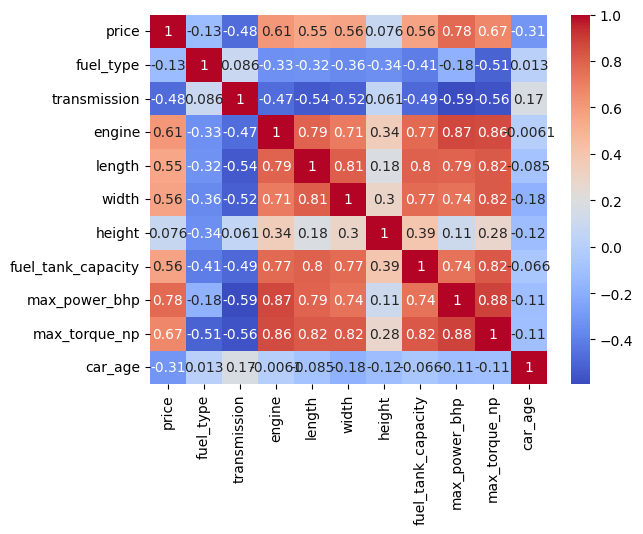

In [150]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [151]:
data.head(10)

,price,fuel_type,transmission,engine,length,width,height,fuel_tank_capacity,max_power_bhp,max_torque_np,car_age
0,505000,6,1,1198.0,3990.0,1680.0,1505.0,35.0,87.0,109.0,8
1,450000,2,1,1248.0,3995.0,1695.0,1555.0,42.0,74.0,190.0,11
2,220000,6,1,1197.0,3585.0,1595.0,1550.0,35.0,79.0,112.0,14
3,799000,6,1,1197.0,3995.0,1745.0,1510.0,37.0,82.0,113.0,6
4,1950000,2,1,2393.0,4735.0,1830.0,1795.0,55.0,148.0,343.0,7
5,675000,6,1,1373.0,4490.0,1730.0,1485.0,43.0,91.0,130.0,8
6,1898999,6,0,1991.0,4630.0,1777.0,1432.0,50.0,181.0,300.0,10
7,2650000,2,0,1995.0,4439.0,1821.0,1612.0,51.0,188.0,400.0,8
8,1390000,6,0,1798.0,4670.0,1814.0,1476.0,50.0,177.0,250.0,8
9,575000,2,1,1461.0,4331.0,1822.0,1671.0,50.0,84.0,200.0,10


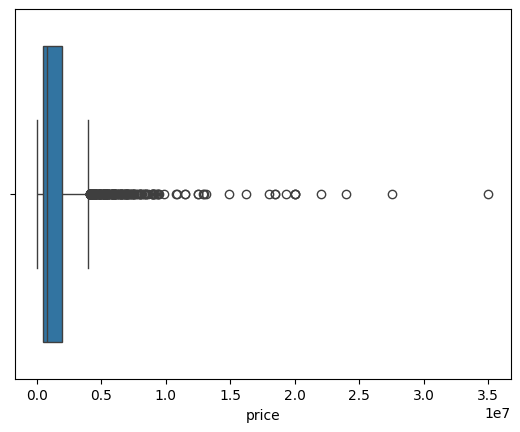

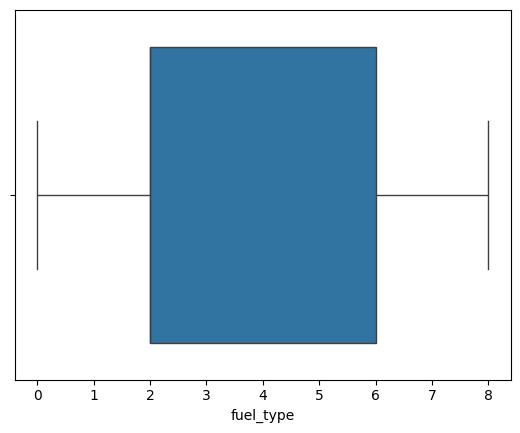

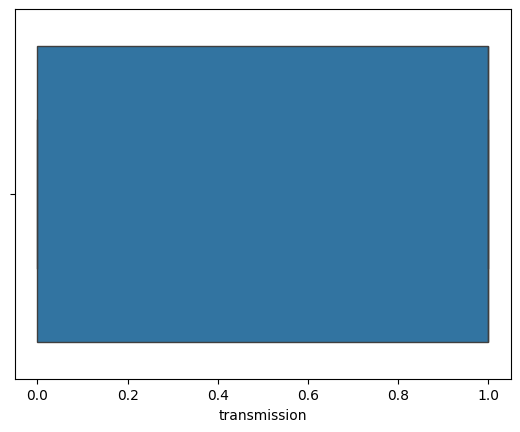

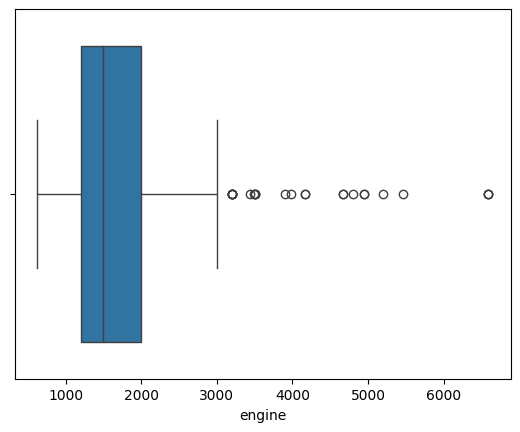

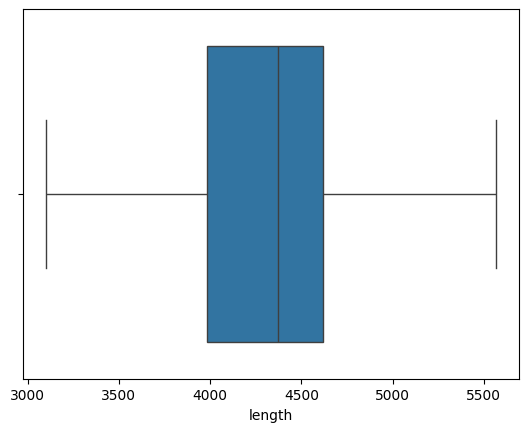

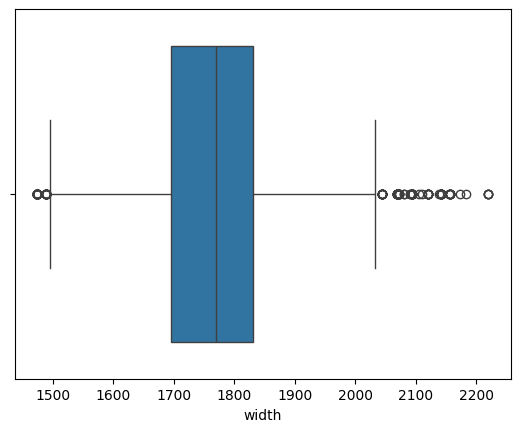

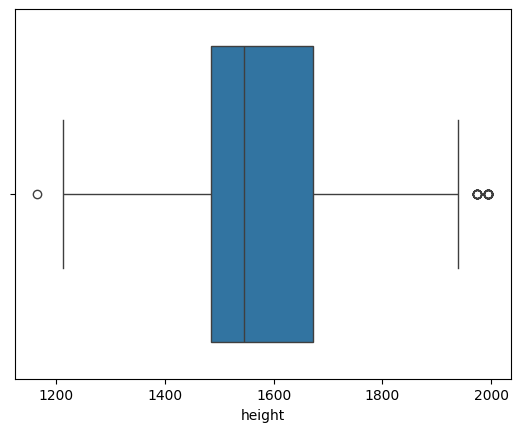

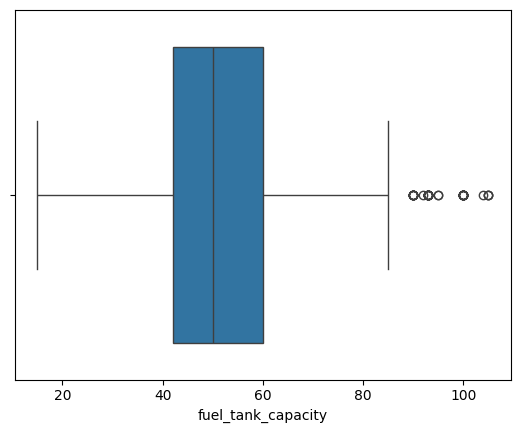

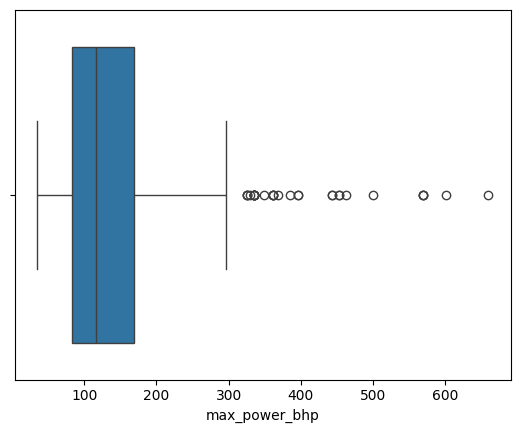

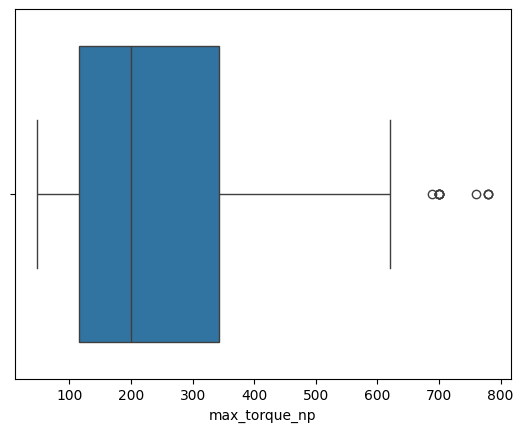

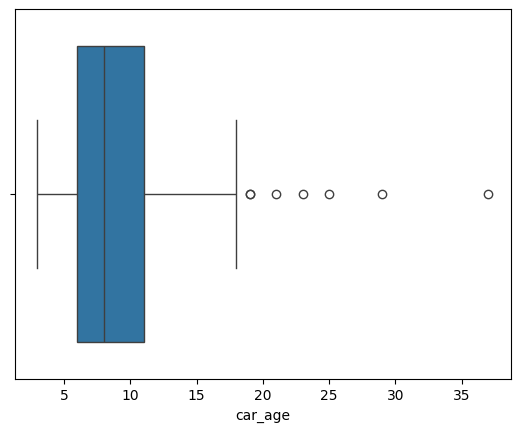

In [152]:
for i in data.columns:
    sns.boxplot(x=data[i])
    plt.show()



In [153]:
def calculate_outlier():
    q1 = data['price'].quantile(0.25)
    q3 = data['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound


In [154]:
data.columns

Index(['price', 'fuel_type', 'transmission', 'engine', 'length', 'width',
       'height', 'fuel_tank_capacity', 'max_power_bhp', 'max_torque_np',
       'car_age'],
      dtype='object')

In [155]:
for i in data.columns:
    lb, ub = calculate_outlier()
    data[i] = np.where(data[i]<lb, lb, data[i])
    data[i] = np.where(data[i]>ub, ub, data[i])


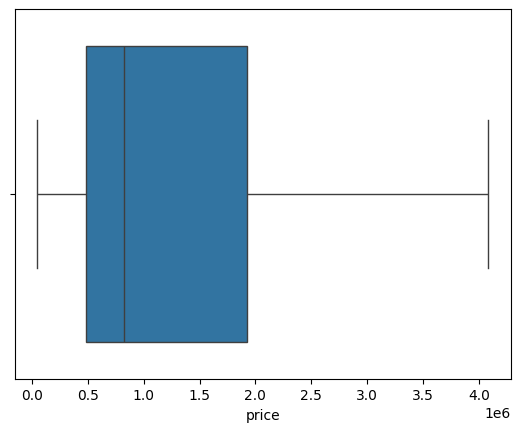

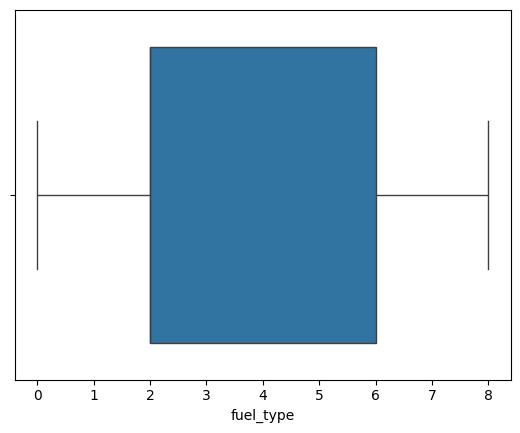

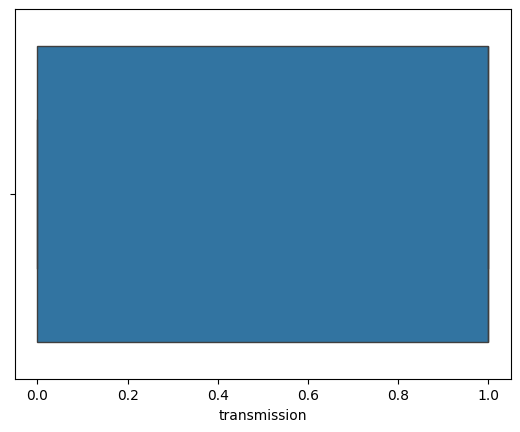

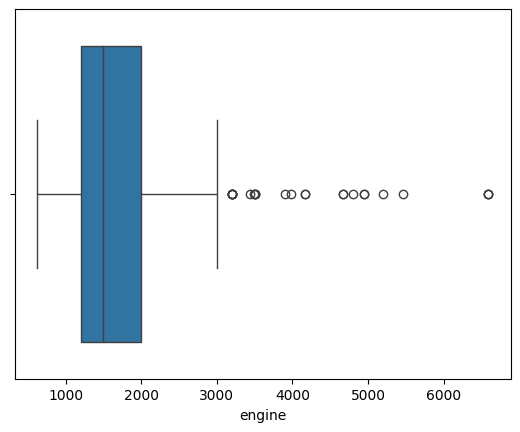

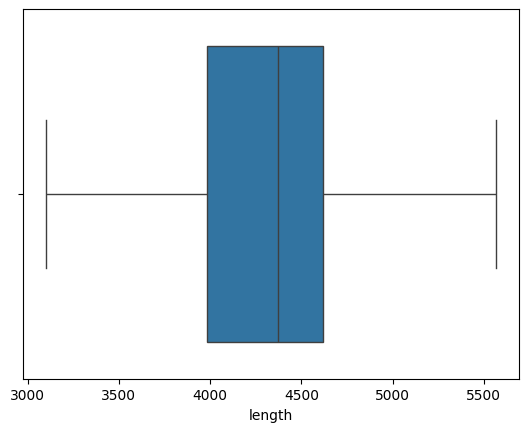

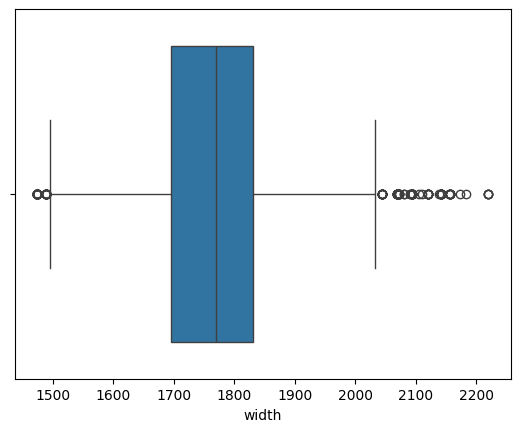

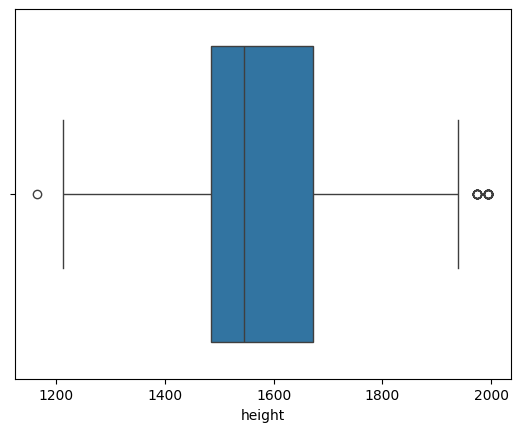

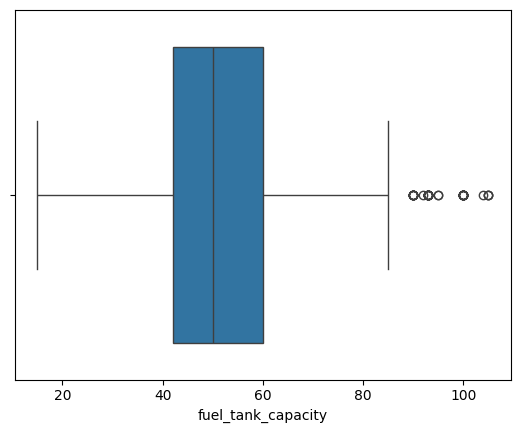

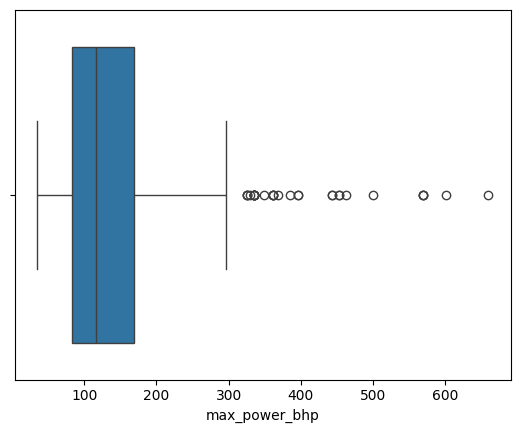

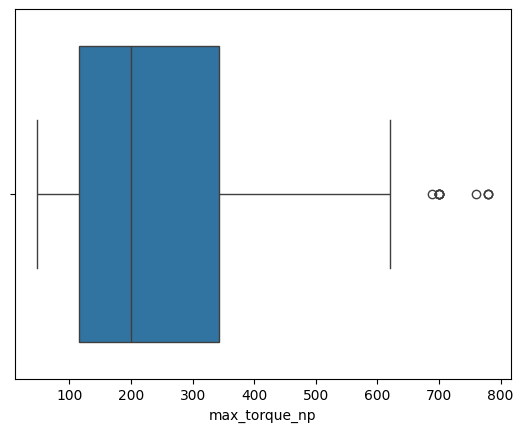

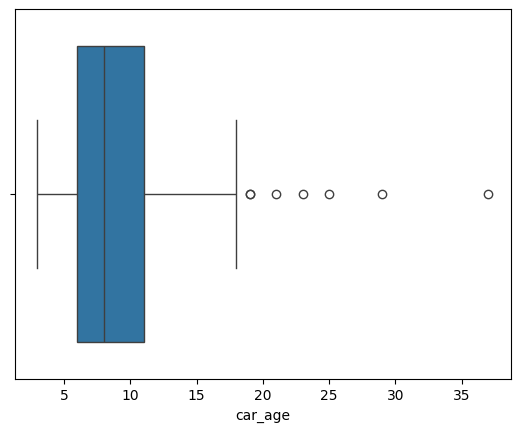

In [156]:
for i in data.columns:
    sns.boxplot(x=data[i])
    plt.show()

In [157]:
data.corr()['price'].sort_values(ascending=False)

price                 1.000000
max_torque_np         0.787460
max_power_bhp         0.780482
width                 0.701424
length                0.697673
fuel_tank_capacity    0.671839
engine                0.650168
height                0.127813
fuel_type            -0.268652
car_age              -0.413639
transmission         -0.657325
Name: price, dtype: float64

In [158]:
X = data.drop(columns=['price'])
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [159]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')



R2 Score: 0.7922
MSE: 322892325251.37
MAE: 414969.23


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = data.drop(columns=['price'])
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

best_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=42
)
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)

best_rf.fit(x_train, y_train)

y_pred = best_rf.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')



R2 Score: 0.9504
MSE: 77056177157.59
MAE: 153966.18


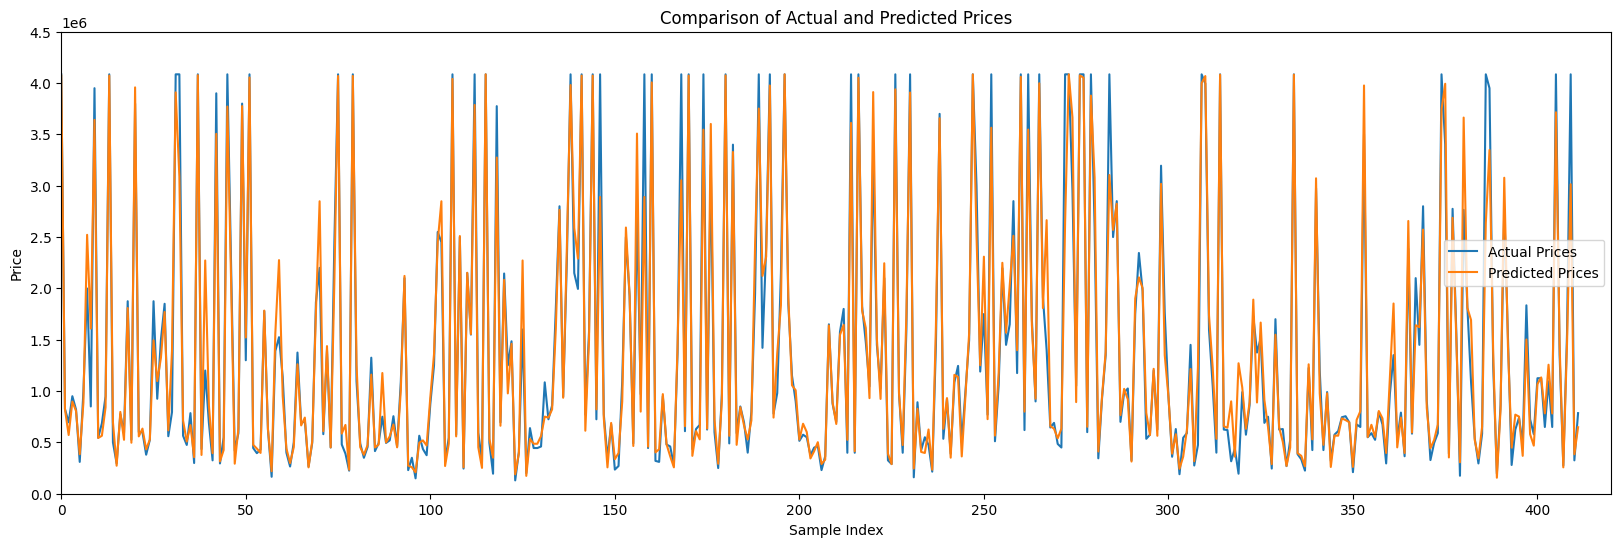

In [161]:
#line chart comparison between actual and predicted prices
plt.figure(figsize=(20, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.xlim(0, 420)
plt.ylim(0.0, 4500000.0)
plt.legend()
plt.show()


In [162]:
data.head()

,price,fuel_type,transmission,engine,length,width,height,fuel_tank_capacity,max_power_bhp,max_torque_np,car_age
0,505000.0,6.0,1.0,1198.0,3990.0,1680.0,1505.0,35.0,87.0,109.0,8.0
1,450000.0,2.0,1.0,1248.0,3995.0,1695.0,1555.0,42.0,74.0,190.0,11.0
2,220000.0,6.0,1.0,1197.0,3585.0,1595.0,1550.0,35.0,79.0,112.0,14.0
3,799000.0,6.0,1.0,1197.0,3995.0,1745.0,1510.0,37.0,82.0,113.0,6.0
4,1950000.0,2.0,1.0,2393.0,4735.0,1830.0,1795.0,55.0,148.0,343.0,7.0


In [163]:
pred = pd.DataFrame([{
    'fuel_type': 6.0,
    'transmission': 1.0,
    'engine': 1198.0,
    'length': 3990.0,
    'width': 1680.0,
    'height': 1505.0,
    'fuel_tank_capacity': 35.0,
    'max_power_bhp': 87.0,
    'max_torque_np': 109.0,
    'car_age': 8.0,
}])

lr.predict(pred)

array([502320.78106902])

In [164]:
pred = pd.DataFrame([{
    'fuel_type': 6.0,
    'transmission': 1.0,
    'engine': 1198.0,
    'length': 3990.0,
    'width': 1680.0,
    'height': 1505.0,
    'fuel_tank_capacity': 35.0,
    'max_power_bhp': 87.0,
    'max_torque_np': 109.0,
    'car_age': 8.0,
}])
best_rf.predict(pred)





array([525143.32833333])